<a href="https://colab.research.google.com/github/hulefei/AI-Notebook/blob/main/%E6%A8%A1%E5%9E%8B%E4%BD%BF%E7%94%A8-rabbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader
!echo "============================================"
!nvcc -V

Tesla T4, 15360 MiB, 15101 MiB
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
#@title Install the required libs
# !pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -U -qq git+https://github.com/hulefei/diffusers.git
!pip install -qq accelerate tensorboard transformers ftfy gradio
!pip install -qq "ipywidgets>=7,<8"
!pip install -qq bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [3]:
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

vae/diffusion_pytorch_model.safetensors not found
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/80 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7F11D97A5210>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F11D97A7010>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F11D97A4CD0>, <PIL.Image.Image image mode=RGB size=512x512 at 0x7F11D97A6A10>]


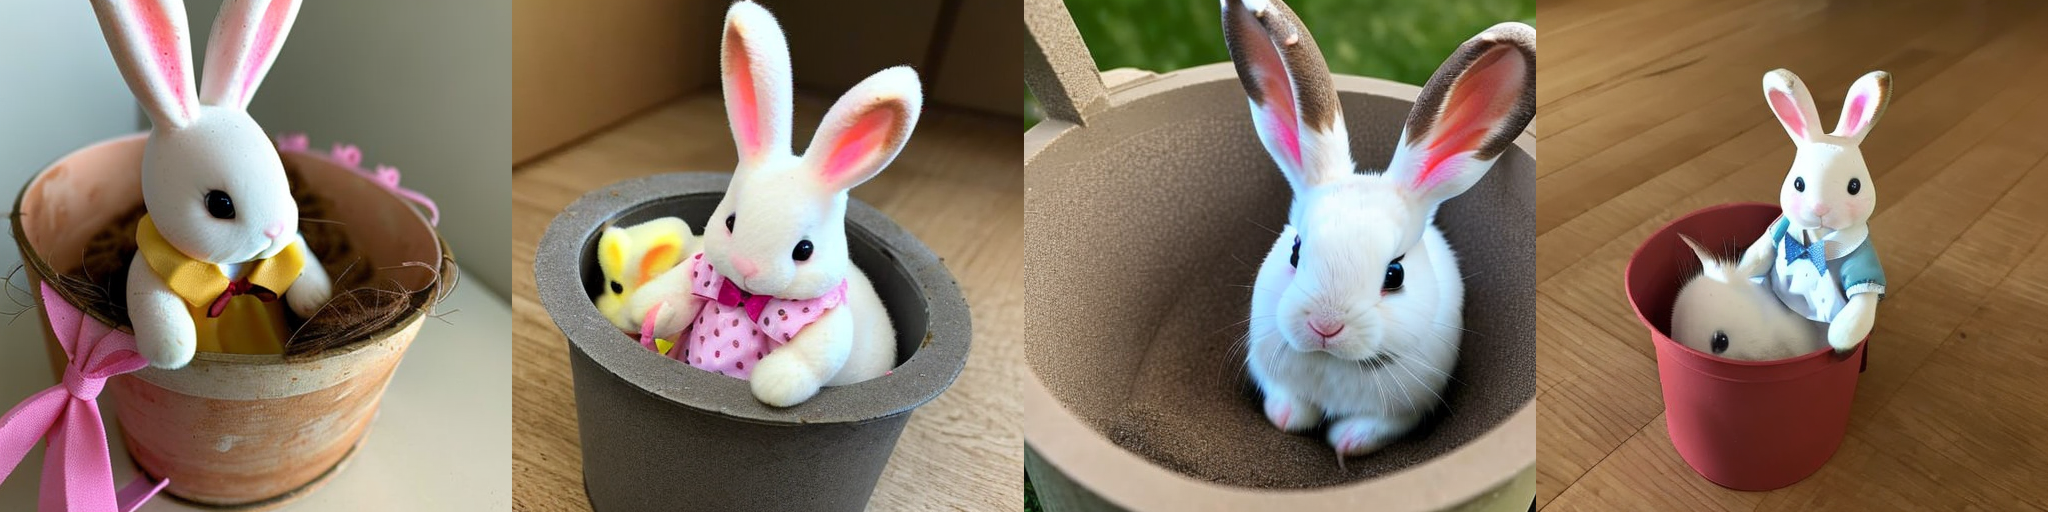

In [6]:
from diffusers import StableDiffusionPipeline
import torch

#@markdown 模型名
pretrained_model_name_or_path = "hulefei/test-rabbit" #@param ["hulefei/test-model", "hulefei/cat-toy", "stabilityai/stable-diffusion-2", "stabilityai/stable-diffusion-2-base", "CompVis/stable-diffusion-v1-4", "runwayml/stable-diffusion-v1-5"] {allow-input: true}
#@markdown 生成prompt
# prompt = "a photo of an astronaut riding a horse on mars" #@param {type:"string"}
prompt = "a photo of a test rabbit in a bucket" #@param {type:"string"}


pipe = StableDiffusionPipeline.from_pretrained(pretrained_model_name_or_path, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

steps = 80 #@param {type:"number"}
num_samples = 4 #@param {type:"number"}
num_rows = 1 #@param {type:"number"}
all_images = [] 
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=steps, guidance_scale=9).images
    all_images.extend(images)

print(all_images)    
grid = image_grid(all_images, num_rows, num_samples)
grid


# image = pipe(prompt).images[0]  
# image


